In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('income.csv')
data.sort_values('income_inequality')

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
5,Azerbaijan,46.0,5.8,2.27,3381.600000,2931.480000,24.215000,'Central and Eastern Europe',5.212,1.02389,Azerbaijan
91,Slovenia,57.0,7.0,2.14,12174.765000,11071.995000,24.678750,'Central and Eastern Europe',5.848,1.18498,Slovenia
103,Ukraine,39.0,5.1,2.44,4129.680000,3643.520000,26.271111,'Central and Eastern Europe',4.681,0.79907,Ukraine
24,Czech Republic,54.0,6.6,2.13,9430.905000,8363.370000,26.413750,'Central and Eastern Europe',6.505,1.17898,Czech Republic
90,Sweden,67.0,7.8,1.72,17032.755000,15166.605000,26.950000,'Western Europe',7.364,1.33171,Sweden
...,...,...,...,...,...,...,...,...,...,...,...
21,Colombia,65.0,7.9,2.09,4618.062857,2618.674286,54.815714,'Latin America and Caribbean',6.477,0.91861,Colombia
109,Zambia,37.0,5.0,2.61,956.760000,510.060000,55.120000,'Sub-Saharan Africa',5.129,0.47038,Zambia
40,Honduras,55.0,7.0,2.46,3080.440000,1757.840000,55.805556,'Latin America and Caribbean',4.788,0.59532,Honduras
14,Botswana,36.0,4.7,2.42,3484.680000,1632.600000,60.460000,'Sub-Saharan Africa',4.332,0.99355,Botswana


In [3]:
avg_income = data['avg_income']
income_ineq = data['income_inequality']
GDP = data['GDP']
happyness = data['happyScore']

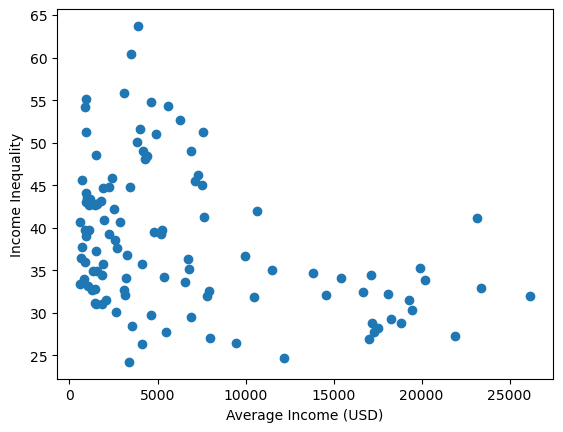

In [4]:
plt.scatter(avg_income, income_ineq)
plt.xlabel('Average Income (USD)')
plt.ylabel('Income Inequality')
plt.show()

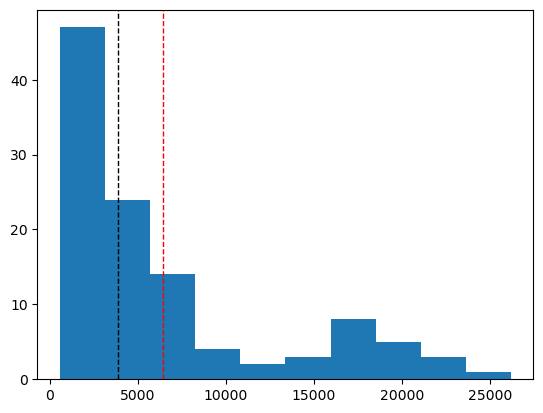

In [5]:
plt.hist(avg_income)
plt.axvline(np.median(avg_income),linestyle='dashed', color='black', linewidth=1)
plt.axvline(np.mean(avg_income),linestyle='dashed', color='red', linewidth=1)
plt.show()

In [6]:
print("Median average income:",np.median(avg_income),"\nMean average income:",np.mean(avg_income))

Median average income: 3889.32 
Mean average income: 6442.75141621464


In [7]:
richest_income = avg_income[avg_income>15000]
richest_ineq = income_ineq[avg_income>15000]

In [8]:
import statsmodels.api as sm

In [9]:
model = sm.OLS(richest_ineq,sm.add_constant(richest_income))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      income_inequality   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     1.698
Date:                Wed, 04 Dec 2024   Prob (F-statistic):              0.211
Time:                        18:24:54   Log-Likelihood:                -46.990
No. Observations:                  18   AIC:                             97.98
Df Residuals:                      16   BIC:                             99.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.9024      5.890      4.058      0.0

/Users/davidemorgante/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


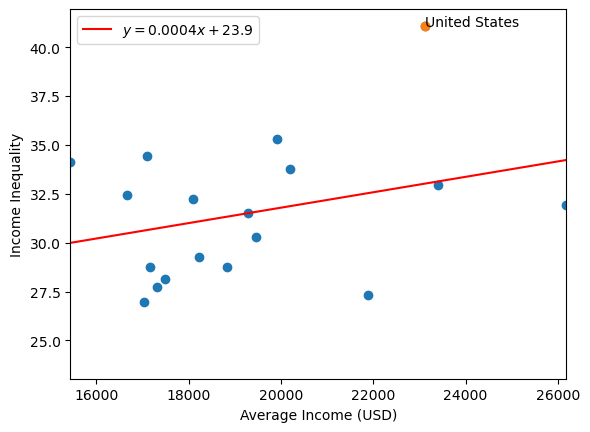

In [10]:
b,m=results.params
               
plt.scatter(richest_income, richest_ineq)
plt.axline(xy1=(0,b),slope=m,  label=f'$y = {m:.4f}x {b:+.1f}$',c='r')
plt.scatter(richest_income[richest_ineq==richest_ineq.max()], richest_ineq.max())
plt.text(richest_income[richest_ineq==richest_ineq.max()].iloc[0], richest_ineq.max(), 'United States', ha='left')
plt.xlim((richest_income.min(),richest_income.max()))
plt.xlabel('Average Income (USD)')
plt.ylabel('Income Inequality')
plt.legend()
plt.show()

Richest countries seem to have an upward trend when it comes to income inequality, same as with the poorest countries

In [11]:
richest = data[data['avg_income']>15000]
richest.sort_values('income_inequality',ascending=False).iloc[0:5]

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
105,United States,62.0,7.3,1.92,23127.000,17925.360,41.09000,'North America',7.119,1.39451,United States
4,Australia,65.0,7.6,1.80,19917.000,15846.060,35.28500,'Australia and New Zealand',7.284,1.33358,Australia
36,United Kingdom,60.0,7.1,1.98,17099.550,14172.735,34.43250,'Western Europe',6.867,1.26637,United Kingdom
49,Italy,57.0,6.6,1.81,15437.595,13163.070,34.12625,'Western Europe',5.948,1.25114,Italy
16,Canada,69.0,8.0,1.71,20190.780,16829.100,33.79000,'North America',7.427,1.32629,Canada


## K-means analysis

In [12]:
from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse
ineq_income = np.column_stack((avg_income, income_ineq))
countries = data['country']

In [13]:
kmean_res = KMeans(n_clusters=3, n_init='auto').fit(ineq_income)
clusters=kmean_res.cluster_centers_

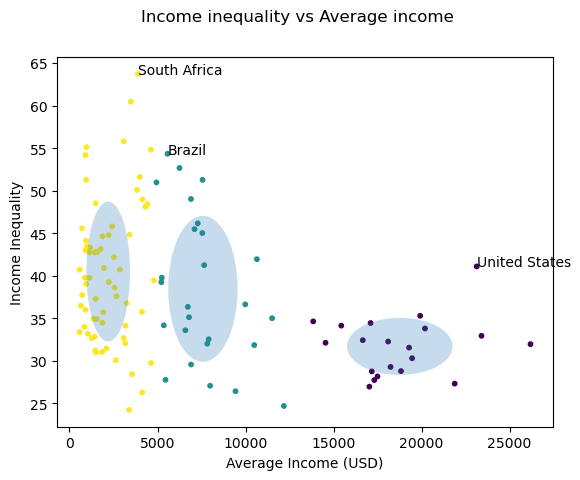

In [14]:
fig, graph = plt.subplots()

graph.scatter(avg_income, income_ineq, c=kmean_res.labels_.astype(float),s=10)
for i in range(3):
    graph.add_patch(Ellipse([clusters[i,0],clusters[i,1]], 
                          2*(np.array(avg_income)[np.where( kmean_res.labels_ == i)].std()),
                          2*(np.array(income_ineq)[np.where( kmean_res.labels_ == i)].std()),
                           alpha=.25))
    graph.text(avg_income[income_ineq==income_ineq.where( kmean_res.labels_ == i).max()].iloc[0], 
              income_ineq.where( kmean_res.labels_ == i).max(), 
              countries[income_ineq==income_ineq.where( kmean_res.labels_ == i).max()].iloc[0], 
              ha='left')
    
graph.set(xlabel='Average Income (USD)',ylabel='Income Inequality')
fig.suptitle('Income inequality vs Average income')

plt.show()
fig.savefig('ineq_income.png', dpi=600)